<img src="https://drive.google.com/uc?export=view&id=1x-QAgitB-S5rxGGDqxsJ299ZQTfYtOhb" width=180, align="center"/>

Master's degree in Intelligent Systems

Subject: 11754 - Deep Learning

Year: 2023-2024

Professor: Miguel Ángel Calafat Torrens

# Lab 4.1 - Pytorch and training
In the previous lab, we trained a neural network, so you've already covered most of the important python concepts for working with neural networks. However, in this practice, we will delve into those that, although they do not form the conceptual base, are absolutely necessary to be able to carry out the work effectively and efficiently.

## Dataset and dataloader objects
[Datasets & Dataloaders](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html)

Pytorch provides these two classes, which you can import from: torch.utils.data.DataLoader and torch.utils.data.Dataset . These classes allow you to use preloaded data sets as well as your own data. _Dataset_ stores the location of the samples with their labels, while _DataLoader_ is an iterable that gives ordered access to the different data in _dataset_.

Next, the _dataset_ [MNIST](https://pytorch.org/vision/stable/datasets.html#qmnist) is used, which is one of those that are already preloaded by default in pytorch. You can find the [information](https://github.com/facebookresearch/qmnist/blob/main/README.md) and [license](https://github.com/facebookresearch/qmnist/blob/main/LICENSE) in the corresponding hyperlinks.

In [1]:
# Connect to your drive
from google.colab import drive, files
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/Colab Notebooks/deep learning/LAB4'
%ls -l

# Here the path of the project folder (which is where this file is) is inserted
# into the python path.
import pathlib
import sys

PROJECT_DIR = str(pathlib.Path().resolve())
sys.path.append(PROJECT_DIR)

Mounted at /content/gdrive
/content/gdrive/MyDrive/Colab Notebooks/deep learning/LAB4
total 106808
drwx------ 2 root root      4096 Apr 15 13:56  data/
-rw------- 1 root root     12988 Apr 15 13:41  helper_PR4.py
-rw------- 1 root root      7029 Apr 15 13:41  LAB-4.ipynb
-rw------- 1 root root    297857 Apr 28 14:10 'LSS4.1-Pytorch _ training.ipynb'
-rw------- 1 root root   3544506 Apr 15 15:22 'LSS4.2-CNN _ transfer learning.ipynb'
-rw------- 1 root root 102870476 Apr 15 15:22  pr4_CNN_model.pt
-rw------- 1 root root   2624938 Apr 15 14:27  pr4model.pt
drwx------ 2 root root      4096 Apr 15 13:55  __pycache__/
drwx------ 2 root root      4096 Apr 15 14:52  weather_images/


In [2]:
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data import random_split
import numpy as np
import torch
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
import time
import copy
import helper_PR4 as hp
import importlib

SEED = 4
np.random.seed(SEED)
torch.manual_seed(SEED)

In [3]:
# Notice that the dataset used is from torchvision; that is, it is
# an image database. In this case, the images show handwritten digits

# Before importing the data it is required to define the type of transformation
# to be applied. This will be seen in detail later. now just apply
# a transform that converts the data into pytorch tensors
transform = transforms.ToTensor()

# A training dataset and a test dataset are assigned. The only difference
# when downloading it is that we put train=False in the test
train_data = datasets.MNIST(root='data',
                            train=True,
                            download=True,
                            transform=transform)
test_dataset = datasets.MNIST(root='data',
                              train=False,
                              download=True,
                              transform=transform)

In [4]:
# Let's have a look to these objects and their attributes
print(type(train_data))
print(hp.inspect_obj(train_data)['attributes'])

<class 'torchvision.datasets.mnist.MNIST'>
['class_to_idx', 'classes', 'data', 'download', 'extra_repr', 'mirrors', 'processed_folder', 'raw_folder', 'resources', 'root', 'target_transform', 'targets', 'test_data', 'test_file', 'test_labels', 'train', 'train_data', 'train_labels', 'training_file', 'transform', 'transforms']


/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")
/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


In [5]:
# The first attribute found is 'class_to_idx'. It is a dictionary that maps the
# names of the classes or categories of images with an identifying index. In
# this case we have 10 different classes (the ten digits) each with its index.
print(type(train_data.class_to_idx))
print(train_data.class_to_idx)

<class 'dict'>
{'0 - zero': 0, '1 - one': 1, '2 - two': 2, '3 - three': 3, '4 - four': 4, '5 - five': 5, '6 - six': 6, '7 - seven': 7, '8 - eight': 8, '9 - nine': 9}


In [6]:
# There is also the 'classes' attribute, which directly lists the class names
# in the same order as they appear in 'class_to_idx'
print(type(train_data.classes))
print(train_data.classes)

<class 'list'>
['0 - zero', '1 - one', '2 - two', '3 - three', '4 - four', '5 - five', '6 - six', '7 - seven', '8 - eight', '9 - nine']


In [7]:
# Another interesting attribute is 'data'. Upon inspection you will see that it
# is a 60,000 position tensor, each of which is a 28x28 matrix. Here we've got
# the data to be used
ob = train_data.data
print(type(ob))
print(ob.shape)

<class 'torch.Tensor'>
torch.Size([60000, 28, 28])


If you wanted to customize your dataset object, you should override the `__len__` and `__getitem__` methods. We aren't doing it in this example because we already have the behavior wanted.

https://pytorch.org/tutorials/beginner/data_loading_tutorial.html#dataset-class

In [8]:
# Let's see some methods of this class. Check that __len__ and __getitem__ exist
print(hp.inspect_obj(train_data, internal=True)['methods'])

['__add__', '__class__', '__class_getitem__', '__delattr__', '__dir__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__len__', '__lt__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '_check_exists', '_check_legacy_exist', '_format_transform_repr', '_load_data', '_load_legacy_data', 'download', 'extra_repr', 'transform', 'transforms']


In [9]:
# Furthermore, as you've seen in theory, we're going to use a percentage of the
# training images for validation. This is necessary to control overfitting.
val_size = 0.2
num_train = len(train_data)

# Number of items of the validation dataset
num_val = int(val_size * num_train)

# Adjust the size of the training set accordingly
num_train = num_train - num_val

# Split the training dataset into train and validation sets
train_dataset, valid_dataset = random_split(train_data, [num_train, num_val])

# Print the number of samples in each set
print(f"Number of samples in train set: {len(train_dataset)}")
print(f"Number of samples in validation set: {len(valid_dataset)}")


Number of samples in train set: 48000
Number of samples in validation set: 12000


In [10]:
# Let's go there with the dataloaders. First of all, as we have done with the
# datasets, let's define the necessary parameters

# num_workers is the number of threads that you can have in parallel
# If you're doing this in Colab, the maximum is 2. If you're doing it locally
# with your own GPU, you'll be able to increase it.
num_workers = 2  # 6

# Next comes the batch size. This indicates how many samples there will be for
# each batch. It shouldn't be too small because it doesn't use all available
# resources, nor too big because it clutters memory.
# In this case, very large sizes could be used since the images take up little
# space; but we will use a smaller number for practicality
batch_size = 1024  # 1024

In [11]:
# And finally we define the dataloaders
train_loader = torch.utils.data.DataLoader(train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True,
                                           num_workers=num_workers)
valid_loader = torch.utils.data.DataLoader(valid_dataset,
                                           batch_size=batch_size,
                                           shuffle=False,
                                           num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False,
                                          num_workers=num_workers)

Dataloader provides an iterable over the _dataset_. Specifically, it is a generator. In the last lab you iterated directly over the dataset using its indices. The usual thing is to iterate over the _dataloader_. Let's see what's in the first batch.

In [12]:
# As before, let's inspect these objects. You will see that the dataloader
# contains the dataset
ob = train_loader
print(hp.inspect_obj(ob)['attributes'])
print(type(ob))
print(ob)

['batch_sampler', 'batch_size', 'check_worker_number_rationality', 'collate_fn', 'dataset', 'drop_last', 'generator', 'multiprocessing_context', 'num_workers', 'persistent_workers', 'pin_memory', 'pin_memory_device', 'prefetch_factor', 'sampler', 'timeout', 'worker_init_fn']
<class 'torch.utils.data.dataloader.DataLoader'>


In [13]:
# Let's see what's in the first batch.
data_iter = iter(train_loader)
images, labels = next(data_iter)

# The images are provided as a tensor of as many positions as the batch defined,
# and then, each image is a tensor of 1 x 28 x 28 pixels
print(images.shape)
print(labels.shape)

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


torch.Size([1024, 1, 28, 28])
torch.Size([1024])


Label: 2


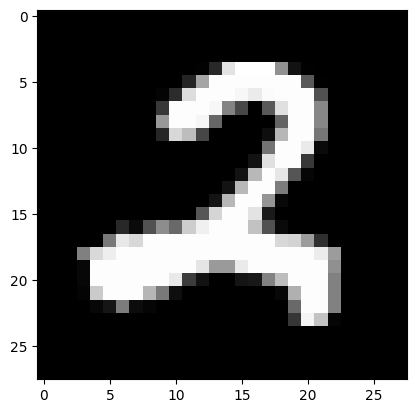

In [14]:
# Check the first image and its associated label
n = 0
plt.imshow(images[n].numpy().squeeze(), cmap='gray')
print('Label: {}'.format(labels.numpy()[n].item()))

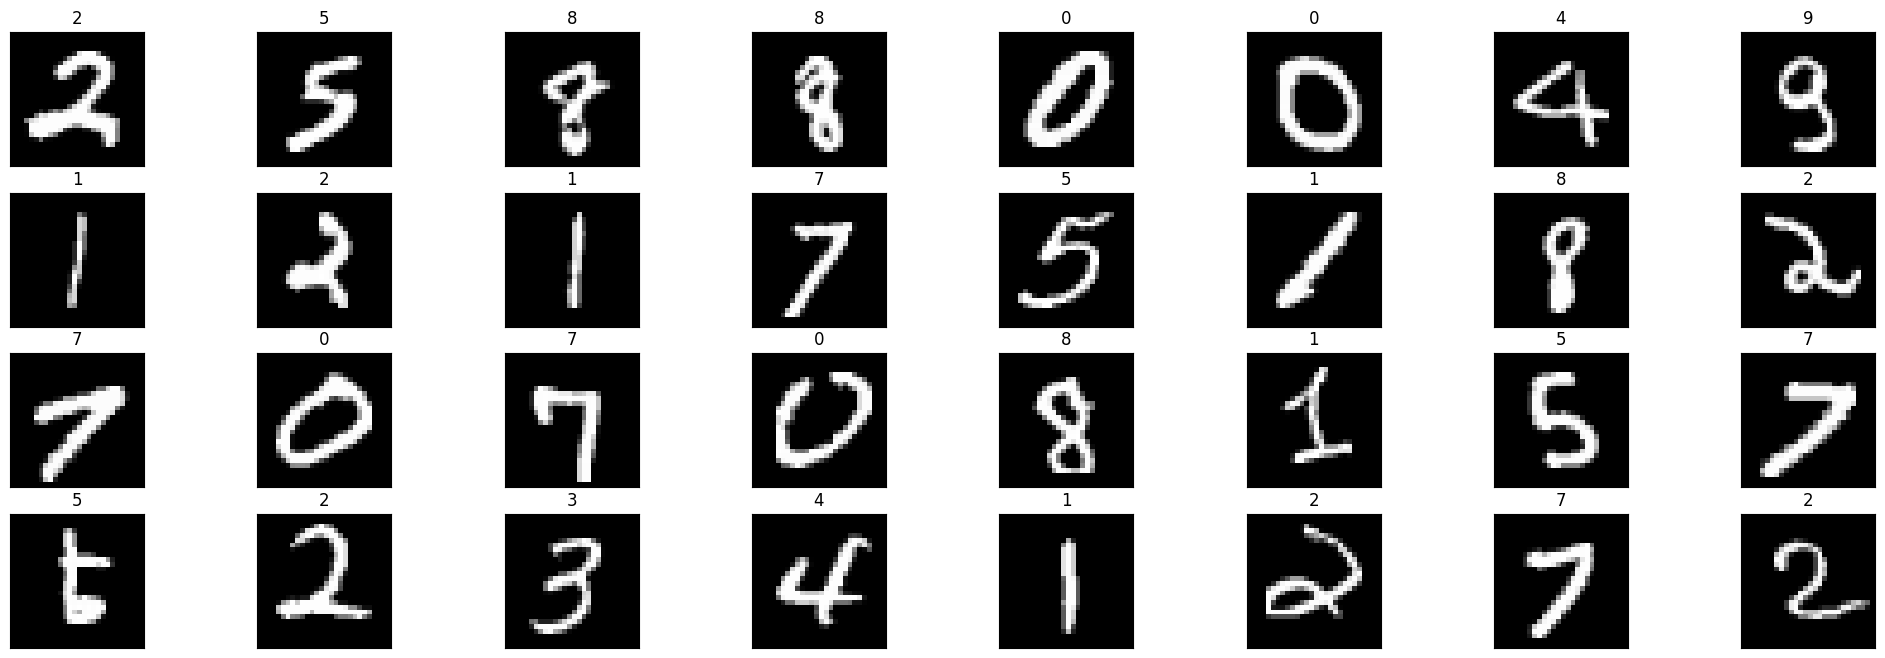

In [15]:
# Now that we know what we have, let's go through the whole batch.
fig = plt.figure(figsize=(25, 8))
bs = 32 if batch_size > 32 else batch_size
for k in range(bs):
    nrs = int(np.ceil(bs / 8))
    ax = fig.add_subplot(nrs, 8, k + 1, xticks=[], yticks=[])
    ax.imshow(images[k].numpy().squeeze(), cmap='gray')
    # The correct label is included on each image
    ax.set_title(str(labels[k].item()))

## The neural network

Next, a neural network is defined as it was done in the previous practice. Note that ReLU is used as the activation layer between dense layers. This prevents the gradient from fading. In addition, dropout layers are also incorporated. Initially they are disabled (p=0.0); but later you will be asked to modify this value.

In [16]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        # Dense layers
        # Three dense layers are defined. The input of the first hidden layer
        # will have as many units as pixels in the image. The output of the
        # last layer will have as many units as classes we want to identify, in
        # this case 10 digits
        self.fc1 = nn.Linear(in_features=28 * 28, out_features=256, bias=True)
        self.fc2 = nn.Linear(in_features=256, out_features=64, bias=True)
        self.fc3 = nn.Linear(in_features=64, out_features=10, bias=True)

        # Activation layers
        self.relu = nn.ReLU()

        # Dropout layers.
        # The parameter p is the probability of each unit to be turned off in
        # the current epoch. We'll see an example shortly. The dropout is now
        # set to disabled.
        self.dropout = nn.Dropout(p=0.0)

    # Definition of forward pass method
    def forward(self, x):
        # The inputs will propagate forward through all the defined layers. The
        # behavior is specified by each function.
        x = x.view(-1, 28 * 28)  # in: b x 28 x 28  out: b x 784
        x = self.relu(self.fc1(x))  # in: b x 784  out: b x 256
        x = self.dropout(x)
        x = self.relu(self.fc2(x))  # in: b x 256  out: b x 64
        x = self.dropout(x)
        x = self.relu(self.fc3(x))  # in: b x 64  out: b x 10
        # Notice how in this case there is no output activation that converts
        # the scores into probabilities.

        return x

In [17]:
# DEVICE is defined. It is capitalized to identify that it is a global variable.
# This is a convention, not a rule. You can put it however you want, although
# you should keep in mind that python is case sensitive.
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(DEVICE)

cuda


In [18]:
# Reset seed for reproducibility
np.random.seed(SEED)
torch.manual_seed(SEED)

In [19]:
# The model is instantiated
model = Network()
print(model)

model = model.to(DEVICE)

Network(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.0, inplace=False)
)


## Loss function

For classification, as in this case, it is convenient to use a loss function of the Cross-Entropy type. In the [documentation](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html#torch.nn.CrossEntropyLoss) you will find the specifications. You will see that the input of this function is the output of the network **without being converted to probabilities** (this is usually referred to in the documentation as _scores_ or _logits_). This is the reason why an activation layer has not been included in the network output. Therefore, one must be aware that when the output probability is required, the corresponding function will have to be applied, which in this case is Softmax.

In [20]:
# Loss function Cross-Entropy
criterion = nn.CrossEntropyLoss()

In [21]:
# The optimizer is defined. In this case we tried Adam. It is usually a good
# option in terms of convergence speed
# https://pytorch.org/docs/stable/generated/torch.optim.Adam.html#torch.optim.Adam
optimizer = torch.optim.Adam(model.parameters(), lr=0.02)

In [22]:
# We arrange the dataloaders in a single object
loaders = {'train': train_loader, 'valid': valid_loader, 'test': test_loader}

## The training

In the last practice we already saw how to train the model. In that case, considerations were not yet made to avoid overfitting. In this case, the training will incorporate validation, which will serve precisely for this. The comparison between training and validation losses is valuable information to know wether the model is overfitting.

In [23]:
def train_pass(data, target, model, optimizer, criterion):
    data, target = data.to(DEVICE), target.to(DEVICE)
    optimizer.zero_grad()
    output = model(data)
    loss = criterion(output, target)
    loss.backward()
    optimizer.step()
    return loss.item()

def valid_pass(data, target, model, criterion):
    data, target = data.to(DEVICE), target.to(DEVICE)
    with torch.no_grad():
        output = model(data)
    loss = criterion(output, target)
    return loss.item()

In [24]:
# Training function. Conceptually it is the same as in the previous practice,
# but now it incorporates validation.
def train(n_epochs, loaders, model, optimizer, criterion):

    valid_loss_min = np.Inf
    tr_loss_list = []  # Training loss values list (per epoch)
    vl_loss_list = []  # Validation loss values list (per epoch)

    # Loop through epochs
    for epoch in range(1, n_epochs + 1):
        start_time = time.time()
        model.train()
        train_loss, valid_loss = 0.0, 0.0

        # Training
        for data, target in loaders['train']:
            train_loss += train_pass(data, target, model, optimizer, criterion)
        # Training losses log
        tr_loss_list.append(train_loss / len(loaders['train']))

        # Validation
        model.eval()
        for data, target in loaders['valid']:
            valid_loss += valid_pass(data, target, model, criterion)
        # Validation losses log
        vl_loss_list.append(valid_loss / len(loaders['valid']))

        # Results
        end_time = time.time()
        print('Epoch: {} \tTraining loss: {:.5f} \tValidation loss: {:.5f}\
            \t Time: {:.1f} s'.format(epoch, tr_loss_list[-1],
                                      vl_loss_list[-1], end_time - start_time))
    return model, (tr_loss_list, vl_loss_list)

In [25]:
# Run this training to see how it works
n_epochs = 40
model, tr_data = train(n_epochs, loaders, model, optimizer, criterion)

Epoch: 1 	Training loss: 1.29342 	Validation loss: 0.87501            	 Time: 12.6 s
Epoch: 2 	Training loss: 0.82841 	Validation loss: 0.82051            	 Time: 8.7 s
Epoch: 3 	Training loss: 0.77395 	Validation loss: 0.63854            	 Time: 6.7 s
Epoch: 4 	Training loss: 0.48979 	Validation loss: 0.37487            	 Time: 6.6 s
Epoch: 5 	Training loss: 0.32228 	Validation loss: 0.36621            	 Time: 6.3 s
Epoch: 6 	Training loss: 0.29910 	Validation loss: 0.34717            	 Time: 6.8 s
Epoch: 7 	Training loss: 0.28247 	Validation loss: 0.34484            	 Time: 5.8 s
Epoch: 8 	Training loss: 0.27294 	Validation loss: 0.34610            	 Time: 7.3 s
Epoch: 9 	Training loss: 0.27261 	Validation loss: 0.35426            	 Time: 5.8 s
Epoch: 10 	Training loss: 0.26575 	Validation loss: 0.35620            	 Time: 7.3 s
Epoch: 11 	Training loss: 0.26159 	Validation loss: 0.37940            	 Time: 5.9 s
Epoch: 12 	Training loss: 0.26331 	Validation loss: 0.37377            	 

Observe how in the previous training the validation best fit does not occur in the last epoch. Next, a plot will be generated to be able to appreciate more clearly what has happened in this training.

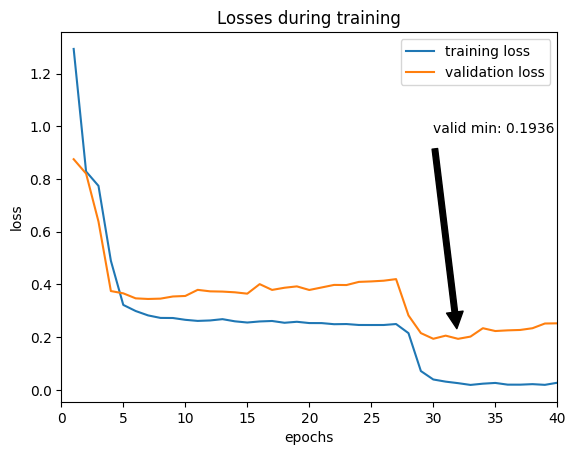

In [26]:
# Generate the plot
x = range(1, 1 + len(tr_data[0]))
tr_losses, vl_losses = tr_data[0], tr_data[1]
tr_max, tr_min = np.max(tr_losses), np.min(tr_losses)
epoch_min = 1 + np.argmin(vl_losses)
val_min = np.min(vl_losses)

plt.plot(x, tr_data[0], label='training loss')
plt.plot(x, tr_data[1], label='validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title("Losses during training")
plt.legend()
plt.annotate('valid min: {:.4f}'.format(val_min), xy=(epoch_min, val_min),
             xytext=(round(0.75 * len(tr_losses)), 3*(tr_max - tr_min)/4 + tr_min),
             arrowprops=dict(facecolor='black', shrink=0.05),
             )
plt.xlim(0, len(tr_losses))
plt.show()

The first conclusion drawn from this training is that, as things have been done, the final trained model is not the best model (the one with the parameters that generalize better in validation). This implies that the best adjustment must be recorded as it occurs.

On the other hand, it can be seen how the validation losses follow a growing trend, while the training losses follow a decreasing trend, the latter being clearly lower. This is a clear overfitting situation.

One of the best techniques to prevent overfitting is the use of dropout layers. In the previous case, dropout layers have been defined; but they have been deactivated when selecting p=0. They will then be activated with p=0.4. This implies that each unit has a 40% chance of turning off in each epoch; that is, on average there will be 40% of the units disabled in each epoch. This way it is avoided that the adjustment falls on only a few units.

In [27]:
# The random seed is reset to redo the training starting from the same point.
del model, optimizer
torch.cuda.empty_cache()

np.random.seed(SEED)
torch.manual_seed(SEED)

# The model is instantiated
model = Network()
# This time with dropout p=0.4
model.dropout = nn.Dropout(p=0.4)
model = model.to(DEVICE)
# The new model optimizer is instantiated
optimizer = torch.optim.Adam(model.parameters(), lr=0.02)
# Do the training
model, tr_data = train(n_epochs, loaders, model, optimizer, criterion)

Epoch: 1 	Training loss: 1.38970 	Validation loss: 0.78574            	 Time: 6.0 s
Epoch: 2 	Training loss: 0.66272 	Validation loss: 0.45140            	 Time: 7.4 s
Epoch: 3 	Training loss: 0.43856 	Validation loss: 0.23614            	 Time: 6.0 s
Epoch: 4 	Training loss: 0.31834 	Validation loss: 0.19779            	 Time: 7.3 s
Epoch: 5 	Training loss: 0.28266 	Validation loss: 0.18871            	 Time: 5.9 s
Epoch: 6 	Training loss: 0.26567 	Validation loss: 0.18069            	 Time: 7.3 s
Epoch: 7 	Training loss: 0.25395 	Validation loss: 0.17171            	 Time: 6.0 s
Epoch: 8 	Training loss: 0.24957 	Validation loss: 0.16923            	 Time: 7.3 s
Epoch: 9 	Training loss: 0.24241 	Validation loss: 0.17528            	 Time: 5.9 s
Epoch: 10 	Training loss: 0.22751 	Validation loss: 0.16769            	 Time: 7.2 s
Epoch: 11 	Training loss: 0.22890 	Validation loss: 0.16597            	 Time: 5.9 s
Epoch: 12 	Training loss: 0.21825 	Validation loss: 0.16836            	 T

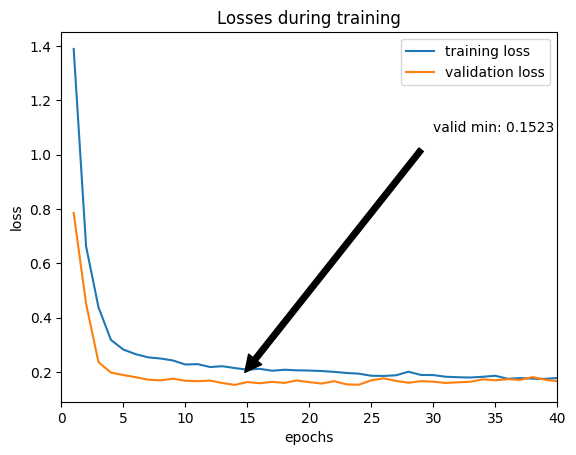

In [28]:
# The plot is generated
x = range(1, 1 + len(tr_data[0]))
tr_losses, vl_losses = tr_data[0], tr_data[1]
tr_max, tr_min = np.max(tr_losses), np.min(tr_losses)
epoch_min = 1 + np.argmin(vl_losses)
val_min = np.min(vl_losses)

plt.plot(x, tr_data[0], label='training loss')
plt.plot(x, tr_data[1], label='validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title("Losses during training")
plt.legend()
plt.annotate('valid min: {:.4f}'.format(val_min), xy=(epoch_min, val_min),
             xytext=(round(0.75 * len(tr_losses)), 3*(tr_max - tr_min)/4 + tr_min),
             arrowprops=dict(facecolor='black', shrink=0.05),
             )
plt.xlim(0, len(tr_losses))
plt.show()

Notice how applying this dropout value, with the same initial weights, the value of the validation adjustment is noticeably better than before. Furthermore, at this point we cannot say that we have overfitting, since the validation losses are better (lower) than the training losses.

Why are validation losses lower than training losses in this case?

**Answer:**
We are applying a dropout during training to avoid overfitting. This technique, as we have seen, is only applied during training and not during validation. If the dropout parameter is too aggressive, then it doesn't allow the model to fit properly during training; for this reason validation, which does not have the handicap of the dropout, offers better results.

As a general rule, it is considered that the model generalizes better in a range between the crossing point of the two curves and the minimum of the validation curve.

<img src="https://drive.google.com/uc?export=view&id=1nZbwtJ5thQXdWlkc1xlRX1u3iDbrrZk2" width=400, align="center"/>


Although unfortunately the training curves do not always have an ideal situation. Sometimes the curves don't intersect; other times the validation curve ends with a horizontal trend, or with a slight positive or negative slope; other times there is a sudden step down because the model was stuck in a local minimum; other times there is a lot of noise and it is not clear, etc. In each case, the appropriate considerations must be made, taking into account the gap between the two curves and the slopes.

Below is a comparison of several training sessions with or without different dropout levels and with different random seeds (the SEED variable that is defined at the beginning of this _notebook_). Do not lose sight of the fact that each random seed implies different initial weights, so logically you can find a combination that improves the ones shown or that have anomalous behaviors. However, use this graph to verify the importance of the initial weights, the validation control and the number of epochs to train.
The validation minimum is indicated by an arrow.

<img src="https://drive.google.com/uc?export=view&id=1ZFFrpC6MG1zlnMy4p9T8hm2yMctFWnlF" width=2000>

Whatever, it is clear that we cannot always select the model of the last trained epoch, since it does not have to be the best model. Therefore, it is convenient to save the best model as it appears.

## Saving and loading models

In general saving and loading models in pytorch is quite simple. In principle, the immediate saving would be the trained weights. This would be done directly with the following instructions:

* torch.save(model.state_dict(), PATH) -> Save the state dictionary
* model.load_state_dict(torch.load(PATH)) -> Load the state dictionary into the model

This type of saving and loading is the most suitable for making inferences. The entire model can also be saved; but this is less common and takes up much more space.

If what is intended is not only to make inferences, but also to retrain, then the usual thing is to save other training parameters that are useful to resume it. [For example](https://pytorch.org/tutorials/beginner/saving_loading_models.html#saving-loading-a-general-checkpoint-for-inference-and-or-resuming-training), as described in the official pytorch tutorials:
```
torch.save({
            'epoch': epoch,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'vl_loss': vl_loss,
            ...
            }, PATH)
```

When loading the model, before making the value assignments, the type of model and optimizer would have to be loaded. Then you would have to assign to each variable the corresponding value of the field stored in the dictionary:

```
checkpoint = torch.load(PATH)
model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
last_epoch_trained = checkpoint['epoch']
vl_loss = checkpoint['vl_loss']
...
```

Finally, depending on what is going to be done next, the model will be put into evaluation or training mode.

In [29]:
# Let's look at one possibility for the model saving and loading functions.
# Keep in mind that you can save any other parameter that you consider of
# interest.
def trained_save(filename, model, optimizer, tr_loss_list, vl_loss_list):
    custom_dict = {'model_state_dict': model.state_dict(),
                   'opt_state_dict': optimizer.state_dict(),
                   'tr_loss_list': tr_loss_list,
                   'vl_loss_list': vl_loss_list}
    torch.save(custom_dict, filename)
    print('Checkpoint saved at epoch {}'.format(len(tr_loss_list)))


def trained_load(filename, model, optimizer):
    checkpoint = torch.load(filename)
    model.load_state_dict(checkpoint['model_state_dict'])
    optimizer.load_state_dict(checkpoint['opt_state_dict'])
    checkpoint.pop('model_state_dict')
    checkpoint.pop('opt_state_dict')

    return model, optimizer, checkpoint

In [30]:
# And now the training function is modified accordingly. Notice that at first
# it checks if a checkpoint is passed. Note that recording results saves the
# checkpoint to disk. The function outputs the best trained model.

def train(n_epochs, loaders, model, optimizer, criterion, checkpoint={}):

    # Training data recovery if applicable
    if bool(checkpoint):
        tr_loss_list = checkpoint['tr_loss_list']
        vl_loss_list = checkpoint['vl_loss_list']
        valid_loss_min = np.min(vl_loss_list)
        trained_epochs = len(tr_loss_list)
        best_state_dict = copy.deepcopy(model.state_dict())
    else:
        tr_loss_list = []
        vl_loss_list = []
        valid_loss_min = np.Inf
        trained_epochs = 0
        best_state_dict = {}

    # Loop through epochs
    for epoch in range(1 + trained_epochs, n_epochs + trained_epochs + 1):
        start_time = time.time()
        model.train()
        train_loss, valid_loss = 0.0, 0.0

        # Training
        # Loop through batches
        for data, target in loaders['train']:
            train_loss += train_pass(data, target, model, optimizer, criterion)
        # Training losses log per epoch
        tr_loss_list.append(train_loss / len(loaders['train']))

        # Validation
        model.eval()
        for data, target in loaders['valid']:
            valid_loss += valid_pass(data, target, model, criterion)
         # Validation losses log per epoch
        vl_loss_list.append(valid_loss / len(loaders['valid']))

        # Results
        end_time = time.time()
        print('Epoch: {} \tTraining loss: {:.5f} \tValidation loss: {:.5f}\
            \t Time: {:.1f} s'.format(epoch, tr_loss_list[-1],
                                      vl_loss_list[-1], end_time - start_time))

        # Recording of results if best validation fit is given
        if vl_loss_list[-1] < valid_loss_min:
            best_state_dict = copy.deepcopy(model.state_dict())
            trained_save(FILENAME, model, optimizer, tr_loss_list, vl_loss_list)
            valid_loss_min = vl_loss_list[-1]

    # The best model is returned and the training data are written before
    # exiting
    model.load_state_dict(best_state_dict)
    trained_save(FILENAME, model, optimizer, tr_loss_list, vl_loss_list)

    return model, (tr_loss_list, vl_loss_list)

In [31]:
# # The name of the file is defined as a global variable, since it will not be
# passed as an argument to the 'train' function, but it will be used.
FILENAME = 'pr4model.pt'

In [32]:
# The random seed is reset to redo the training starting from the same point.
del model, optimizer
torch.cuda.empty_cache()
np.random.seed(SEED)
torch.manual_seed(SEED)

# The model is instantiated
model = Network()
# This time with dropout p=0.3
model.dropout = nn.Dropout(p=0.3)
model = model.to(DEVICE)
# The new model optimizer is instantiated
optimizer = torch.optim.Adam(model.parameters(), lr=0.02)

In [33]:
# Let's do the training again. This time saving the best model.
n_epochs = 26
model, tr_data = train(n_epochs, loaders, model, optimizer, criterion)

Epoch: 1 	Training loss: 1.37145 	Validation loss: 0.58025            	 Time: 8.8 s
Checkpoint saved at epoch 1
Epoch: 2 	Training loss: 0.64827 	Validation loss: 0.47242            	 Time: 7.4 s
Checkpoint saved at epoch 2
Epoch: 3 	Training loss: 0.53653 	Validation loss: 0.43318            	 Time: 6.0 s
Checkpoint saved at epoch 3
Epoch: 4 	Training loss: 0.50186 	Validation loss: 0.41810            	 Time: 7.4 s
Checkpoint saved at epoch 4
Epoch: 5 	Training loss: 0.47981 	Validation loss: 0.41531            	 Time: 5.9 s
Checkpoint saved at epoch 5
Epoch: 6 	Training loss: 0.46656 	Validation loss: 0.41112            	 Time: 7.0 s
Checkpoint saved at epoch 6
Epoch: 7 	Training loss: 0.45428 	Validation loss: 0.39601            	 Time: 6.3 s
Checkpoint saved at epoch 7
Epoch: 8 	Training loss: 0.44389 	Validation loss: 0.39723            	 Time: 6.8 s
Epoch: 9 	Training loss: 0.43797 	Validation loss: 0.39743            	 Time: 6.6 s
Epoch: 10 	Training loss: 0.43947 	Validation lo

In [34]:
# Now a checkpoint with the best result and the simulation data will have been
# automatically saved.
model, optimizer, checkpoint = trained_load(FILENAME, model, optimizer)

In [35]:
# We define a function to plot the training
def plot_checkpoint(checkpoint):
    x = range(1, 1 + len(checkpoint['tr_loss_list']))
    tr_losses, vl_losses = checkpoint['tr_loss_list'], checkpoint['vl_loss_list']
    tr_max, tr_min = np.max(tr_losses), np.min(tr_losses)
    epoch_min = 1 + np.argmin(vl_losses)
    val_min = np.min(vl_losses)

    plt.plot(x, tr_losses, label='training loss')
    plt.plot(x, vl_losses, label='validation loss')
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.title("Losses during training")
    plt.legend()
    plt.annotate('valid min: {:.4f}'.format(val_min), xy=(epoch_min, val_min),
                 xytext=(round(0.75 * len(tr_losses)), 3*(tr_max - tr_min)/4 + tr_min),
                 arrowprops=dict(facecolor='black', shrink=0.05),
                 )
    plt.xlim(0, len(tr_losses))
    plt.show()

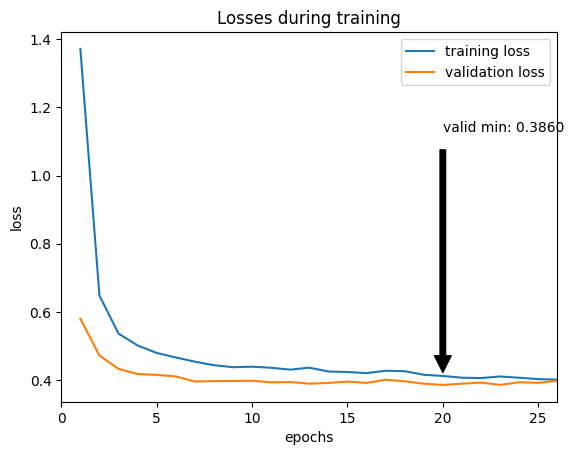

In [36]:
# Plot it
plot_checkpoint(checkpoint)

In [37]:
# Now let's see what happens if you train a few more epochs. Notice that the
# checkpoint is passed as an argument. Also, at this point we can modify the
# learning rate if we consider that this can improve the training.
for d in optimizer.param_groups: d['lr'] = 0.01

# Let's train again
n_epochs = 14
model, tr_data = train(n_epochs, loaders, model, optimizer, criterion, checkpoint)

Epoch: 27 	Training loss: 0.39055 	Validation loss: 0.38352            	 Time: 6.8 s
Checkpoint saved at epoch 27
Epoch: 28 	Training loss: 0.38010 	Validation loss: 0.37778            	 Time: 6.4 s
Checkpoint saved at epoch 28
Epoch: 29 	Training loss: 0.37755 	Validation loss: 0.38158            	 Time: 6.6 s
Epoch: 30 	Training loss: 0.37250 	Validation loss: 0.38089            	 Time: 6.8 s
Epoch: 31 	Training loss: 0.37167 	Validation loss: 0.38350            	 Time: 6.3 s
Epoch: 32 	Training loss: 0.37256 	Validation loss: 0.38946            	 Time: 7.0 s
Epoch: 33 	Training loss: 0.36853 	Validation loss: 0.39009            	 Time: 6.0 s
Epoch: 34 	Training loss: 0.37109 	Validation loss: 0.38000            	 Time: 7.4 s
Epoch: 35 	Training loss: 0.37502 	Validation loss: 0.38327            	 Time: 5.9 s
Epoch: 36 	Training loss: 0.36677 	Validation loss: 0.38052            	 Time: 7.4 s
Epoch: 37 	Training loss: 0.36811 	Validation loss: 0.38518            	 Time: 5.9 s
Epoch: 

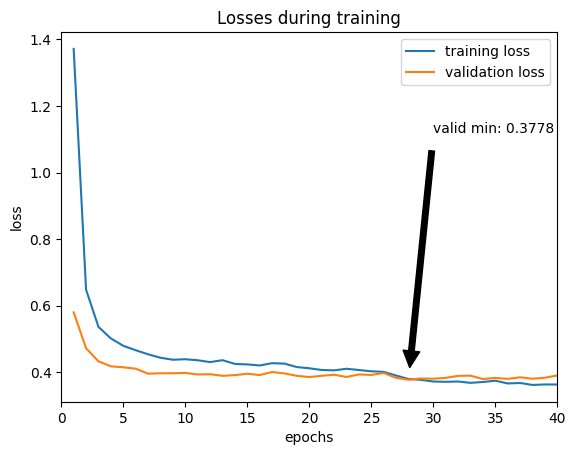

In [38]:
# The results are displayed. Notice how the complete training is displayed,
# combining both the previous and the current one.
plot_checkpoint(checkpoint)

## Test the model

Once the model has been trained and validated, next we have to test it with data that it has never seen before. For this we are going to use the _test_loader_ defined at the beginning of this lab.

**Before continuing, do the problem 1 of the notebook `Lab-4.ipynb` and then come back here**

In [39]:
# In case you want to reload the helper function, execute this cell
importlib.reload(hp)

<module 'helper_PR4' from '/content/gdrive/MyDrive/Colab Notebooks/deep learning/LAB4/helper_PR4.py'>

In [40]:
# See the content of the helper file
files.view(hp.__name__ + '.py')

<IPython.core.display.Javascript object>

In [41]:
# If your functions are correct you should see the message
# "All tests passed!" when executing this command uncommented
# !python 'helper_PR4.py'

In [42]:
# Very high accuracy values can be achieved, although one reason for this is
# that the type of images is very constrained
accuracy, test_loss, outputs = hp.do_test(model, loaders, criterion)

# If you haven't changed the seed, you should see an accuracy of 0.86
print('Accuracy: {:.2f}'.format(accuracy))

Accuracy: 0.86


### Probability

When calculating the precision, there was no need to calculate the odds that the system gives each class of being correct. This data may be of interest in some applications, since probabilities that are not high enough could cause the system's prediction to be discarded and vice versa.

Let's see how to calculate it. Remember that in the defined model the output did not have an activation layer that converted the values into probabilities. An output of this type is often called _scores_ or _logits_. To have the probabilities, you only have to apply the corresponding activation layer. For the case at hand, a classification, we will use Softmax.

In [43]:
# We select the first iteration of the test dataloader
data_iter = iter(test_loader)
images, labels = next(data_iter)

In [44]:
# We apply a test step and obtain logits
_, output = hp.testing_pass(images, labels, model, criterion)
print(output.shape)

torch.Size([1024, 10])


In [45]:
# We apply the activation layer and get probabilities
output_prob = torch.softmax(output, dim=1)

In [46]:
# To check that there was no error, let's look at the result of the first
# image. It is a vector of probabilities.
print(output_prob[0])

tensor([4.8331e-11, 4.8331e-11, 1.9108e-08, 6.6138e-10, 4.8331e-11, 4.8331e-11,
        4.8331e-11, 1.0000e+00, 4.8331e-11, 2.4602e-07], device='cuda:0')


In [47]:
# The sum of the 10 probabilities associated with this image should be equal
# to 1, since there are only these 10 possible outputs.
print(torch.sum(output_prob[0]).item())

1.0


In [48]:
# The indices corresponding to the maximum values are obtained
_, pred_labels = torch.max(output, dim=1)

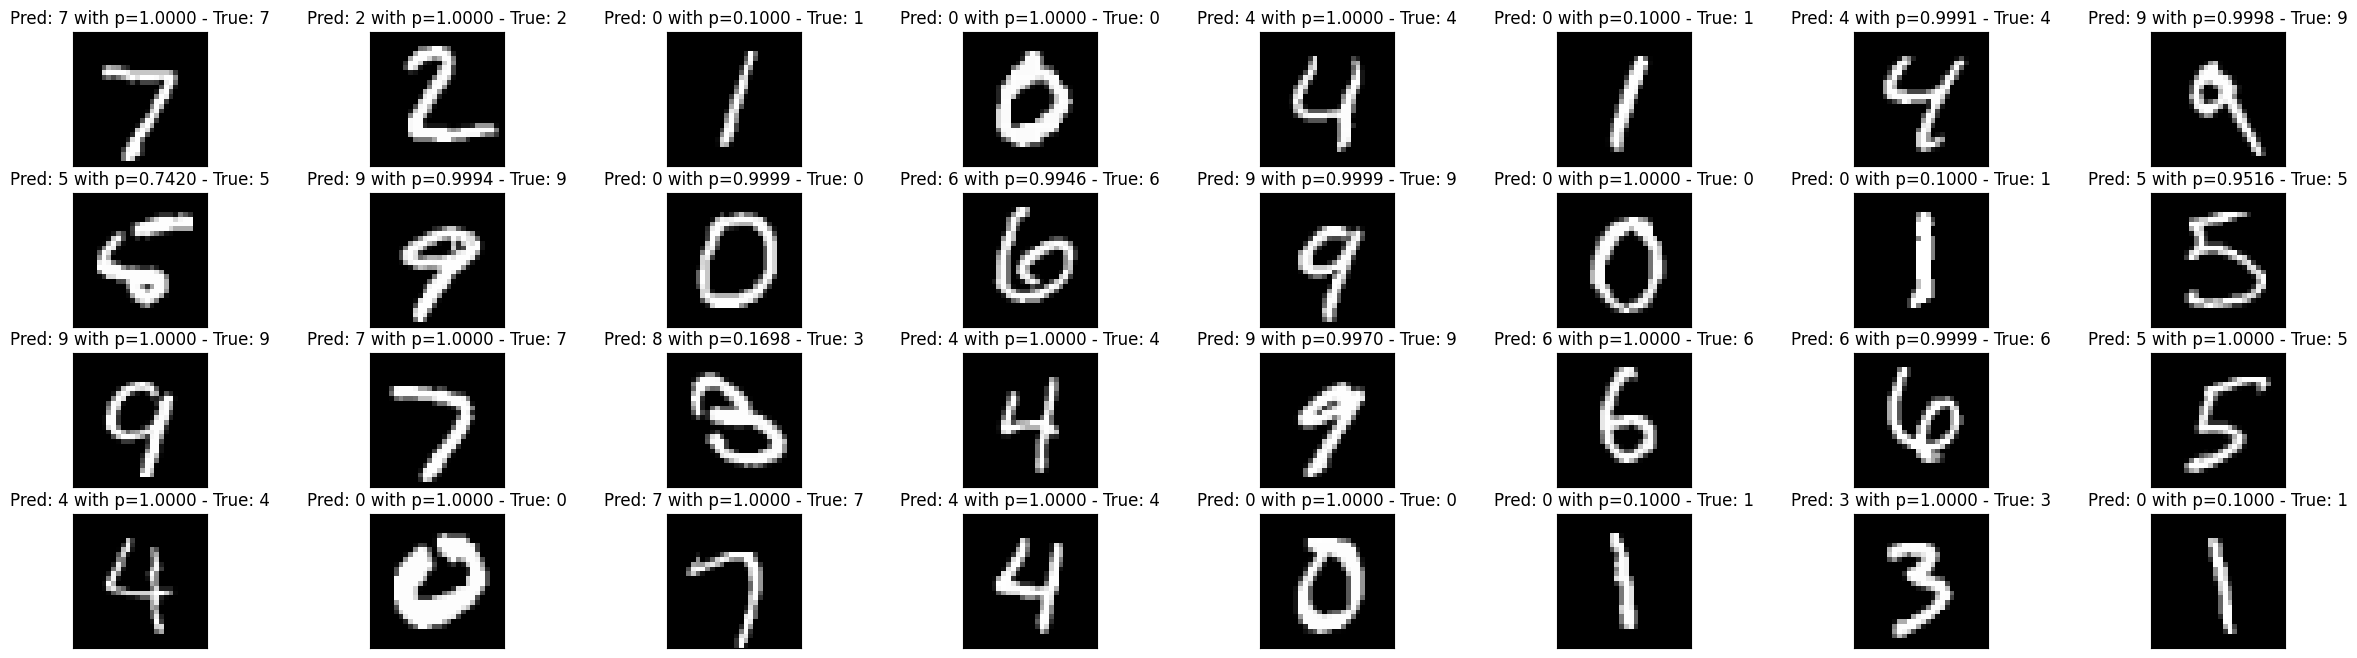

In [49]:
# Viewing prediction results in a batch
fig = plt.figure(figsize=(30, 8))
bs = 32 if len(labels) > 32 else len(labels)
for k in range(bs):
    ax = fig.add_subplot(int(np.ceil(bs / 8)), 8, k + 1, xticks=[], yticks=[])
    ax.imshow(images[k].numpy().squeeze(), cmap='gray')
    # The predicted label, the probability and the correct label are included
    ax.set_title('Pred: {} with p={:.4f} - True: {}'.format(
        pred_labels[k].item(), output_prob[k, pred_labels[k].item()].item(),
        str(labels[k].item())))

### Mapping with class_to_idx

This time we have used one of the datasets that come by default in pytorch and that has simplified things. On other occasions, the normal thing will be that you use your own datasets or obtained from other sources, but that are not the ones that are downloaded by default in pytorch. In these cases, you may have a data folder that in turn has several subfolders. In each of these subfolders would be the images. For example, let's imagine that we have on our computer all the handwritten digit images from MNIST that we want to train with. They are in a folder that in turn contains 10 folders with the names folder01, folder02, folder03, ...

In this case we would not have downloaded anything from pytorch. We would have simply referenced our project folder on dataset load:
```
train_data = datasets.ImageFolder(TRAIN_FOLDER_PATH, transform=transform)
```

Well, in this way the values of the _classes_ and _class_to_idx_ attributes of the _dataset_ would be the following:
```
print(train_data.classes)
>>> ['folder01', 'folder02', 'folder03', 'folder04', 'folder05', 'folder06', 'folder07', 'folder08', 'folder09', 'folder10']

print(train_data.class_to_idx)
>>> {'folder01': 0,
     'folder02': 1,
     'folder03': 2,
     'folder04': 3,
     'folder05': 4,
     'folder06': 5,
     'folder07': 6,
     'folder08': 7,
     'folder09': 8,
     'folder10': 9}
```
You may have noticed by now that this does not identify what is in each folder. The index is just a folder pointer, but it doesn't give any information about the content.

So you can't know what's in each folder, unless you go in and look at it, and rename the folders. In practice this is not always possible, since if you work with images of poisonous mushrooms you may not be able to identify them from the image. For this reason, datasets often come with a file that identifies the content. For example, let's imagine that in this case it came with a .json file that when loaded we had a dictionary-type variable with the following values.
```
import json

# Load the json file
with open('archive.json', 'r') as f:
    foldername_to_category = json.load(f)

print(foldername_to_category)
>>> {'folder01': 'images of one',
     'folder02': 'images of two',
     'folder03': 'images of three',
     'folder04': 'images of four',
     'folder05': 'images of five',
     'folder06': 'images of six',
     'folder07': 'images of seven',
     'folder08': 'images of eight',
     'folder09': 'images of nine',
     'folder10': 'images of zero'}
```

So we would no longer have any problem to identify everything. The training would have been the same as the one carried out. Simply, when the system prediction was a given index, we would know which images it refers to by doing:

```
print(prediction)
>>> 0
print(train_data.classes[prediction])
>>> 'folder01'
print(foldername_to_category[train_data.classes[prediction]])
>>> 'images of one'
```

Possibly the best solution would be to create a dictionary that would relate the indices to the actual contents.


In [50]:
# Example
# Imagine that the network had trained with images of mushrooms and not with digits
# You have train_data.class_to_idx and train_data.classes
print('class_to_idx:\n{}\n'.format(train_data.class_to_idx))
print('classes:\n{}\n'.format(train_data.classes))

# On the other hand, you are provided with the variable fname_to_cat below,
# which has the structure {key: folder name, value: name of a mushroom} (it is
# understood, logically, that if this assumption were fulfilled we would have
# images of that type in that folder of specific mushroom and of no other type).
# From this data, it generates a dictionary-like object called index_to_cat
# with the structure {key: output index, value: mushroom name}
fname_to_cat =  {'0 - zero': 'amanita caesarea',
                 '1 - one': 'agaricus campester',
                 '2 - two': 'boletus edulis',
                 '3 - three': 'lactarius deliciosus',
                 '4 - four': 'cantharellus cibarius',
                 '5 - five': 'tuber melanosporum',
                 '6 - six': 'pleurotus eryngii',
                 '7 - seven': 'calocybe gambosa',
                 '8 - eight': 'cantharellus lutescens',
                 '9 - nine': 'craterellus cornucopioides'}

# One option would be the following
index_to_cat = {idx: fname_to_cat[train_data.classes[idx]] for idx, foldername
                in enumerate(train_data.classes)}

print('index_to_cat:\n{}\n'.format(index_to_cat))

class_to_idx:
{'0 - zero': 0, '1 - one': 1, '2 - two': 2, '3 - three': 3, '4 - four': 4, '5 - five': 5, '6 - six': 6, '7 - seven': 7, '8 - eight': 8, '9 - nine': 9}

classes:
['0 - zero', '1 - one', '2 - two', '3 - three', '4 - four', '5 - five', '6 - six', '7 - seven', '8 - eight', '9 - nine']

index_to_cat:
{0: 'amanita caesarea', 1: 'agaricus campester', 2: 'boletus edulis', 3: 'lactarius deliciosus', 4: 'cantharellus cibarius', 5: 'tuber melanosporum', 6: 'pleurotus eryngii', 7: 'calocybe gambosa', 8: 'cantharellus lutescens', 9: 'craterellus cornucopioides'}

